# Libraries Import and Dataset Initialization

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("./dataset/Air_Traffic_Passenger_Statistics.csv")
data

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271.0,Deplaned,27271.0,2005.0,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131.0,Enplaned,29131.0,2005.0,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415.0,Thru / Transit * 2,10830.0,2005.0,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156.0,Deplaned,35156.0,2005.0,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090.0,Enplaned,34090.0,2005.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636.0,Enplaned,194636.0,2016.0,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189.0,Deplaned,4189.0,2016.0,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693.0,Enplaned,4693.0,2016.0,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313.0,Deplaned,12313.0,2016.0,March


# Data Preprocessing

## Check for Null Values

In [27]:
row, col = data.shape
number_of_row_with_null_values = data.isnull().sum().sum()
null_percentage = number_of_row_with_null_values / row

print(f"Terdapat {number_of_row_with_null_values} baris dengan null values dari total {row} baris.")
print(f"Jumlah baris yang memiliki nilai null hanya {null_percentage:.2%}")

Terdapat 348 baris dengan null values dari total 15007 baris.
Jumlah baris yang memiliki nilai null hanya 2.32%


In [28]:
data[data.isnull().any(axis=1)]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
148,200508,Boeing Company,NaN,Boeing Company,NaN,Domestic,US,Deplaned,Other,Other,Other,18.0,Deplaned,18.0,2005.0,August
6814,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,73.0,Deplaned,73.0,2010.0,May
6815,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,73.0,Enplaned,73.0,2010.0,May
6925,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Deplaned,Other,International,A,160.0,Deplaned,160.0,2010.0,June
6926,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Enplaned,Other,International,A,160.0,Enplaned,160.0,2010.0,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14666,"201601,""COPA Airlines, Inc."",CM,""COPA Airlines...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14788,"201602,""COPA Airlines, Inc."",CM,""COPA Airlines...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14789,"201602,""COPA Airlines, Inc."",CM,""COPA Airlines...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14910,"201603,""COPA Airlines, Inc."",CM,""COPA Airlines...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.dropna(inplace = True)

In [30]:
number_of_row_with_null_values_after_drop = data.isnull().sum().sum()
print(number_of_row_with_null_values_after_drop)
display(data[data.isnull().any(axis=1)])

0


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month


# Insights

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14937 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              14937 non-null  object 
 1   Operating Airline            14937 non-null  object 
 2   Operating Airline IATA Code  14937 non-null  object 
 3   Published Airline            14937 non-null  object 
 4   Published Airline IATA Code  14937 non-null  object 
 5   GEO Summary                  14937 non-null  object 
 6   GEO Region                   14937 non-null  object 
 7   Activity Type Code           14937 non-null  object 
 8   Price Category Code          14937 non-null  object 
 9   Terminal                     14937 non-null  object 
 10  Boarding Area                14937 non-null  object 
 11  Passenger Count              14937 non-null  float64
 12  Adjusted Activity Type Code  14937 non-null  object 
 13  Adjusted Passenger Co

In [32]:
data.describe()

,Passenger Count,Adjusted Passenger Count,Year
count,14937.000000,14937.000000,14937.000000
mean,29373.844815,29465.662717,2010.375243
std,58423.329236,58387.692869,3.138686
min,1.000000,1.000000,2005.000000
25%,5426.000000,5533.000000,2008.000000
50%,9274.000000,9438.000000,2010.000000
75%,21267.000000,21281.000000,2013.000000
max,659837.000000,659837.000000,2016.000000


## 1. Trend pertumbuhan jumlah penumpang dari tahun ke tahun

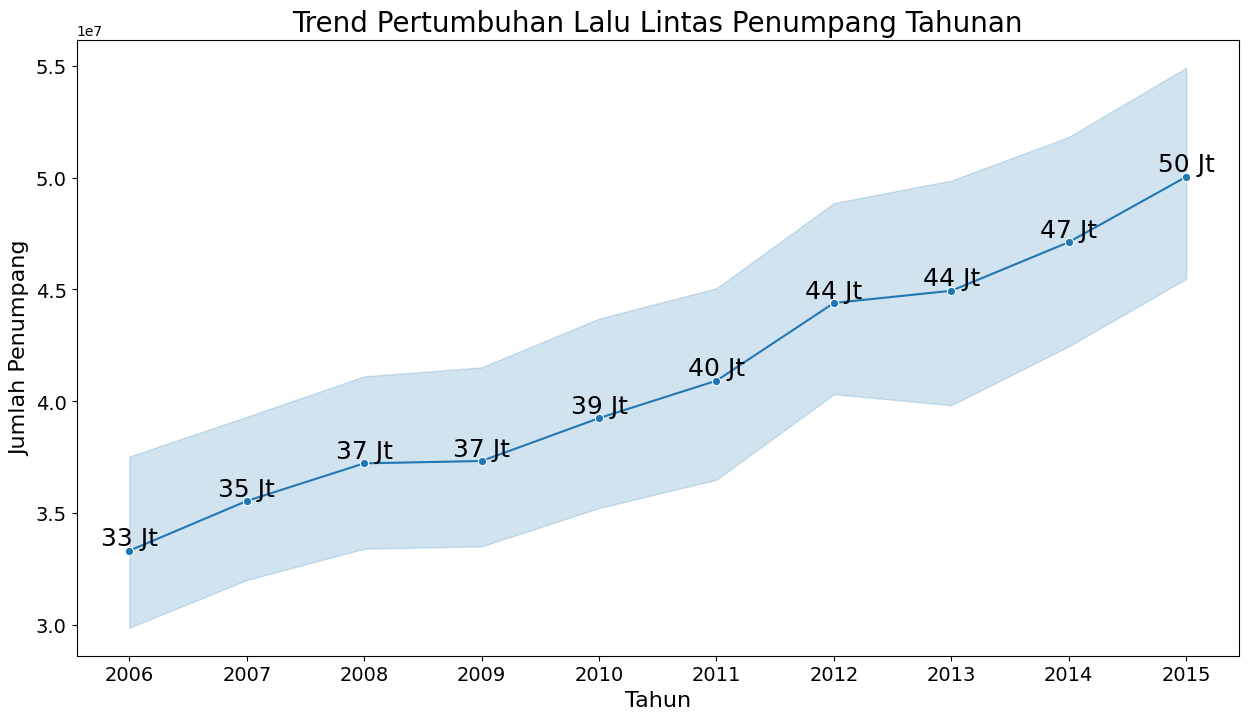

In [113]:
passenger_count_by_year = data.groupby("Year")["Passenger Count"].sum()

plt.figure(figsize=(15, 8))
sns.lineplot(data=data[(data["Year"] != 2005) & (data["Year"] != 2016)], x="Year", y="Passenger Count", estimator="sum", marker="o", markersize=6)
plt.title("Trend Pertumbuhan Lalu Lintas Penumpang Tahunan", fontsize=20)
plt.xlabel("Tahun", fontsize=16)
plt.ylabel("Jumlah Penumpang", fontsize=16)

years = data[(data["Year"] != 2005) & (data["Year"] != 2016)]["Year"].unique()
plt.xticks(years, fontsize=14)
plt.yticks(fontsize=14)

for year, passenger_count in passenger_count_by_year.items():
    if year not in [2005, 2016]:
        label = f"{int(passenger_count/1e6)} Jt"
        plt.text(year, passenger_count, label, ha="center", va="bottom", fontsize=18)

plt.show()

<p style=font-size:24px>Penjelasan: Grafik menggunakan garis (line) untuk menunjukkan tren pertumbuhan lalu lintas penumpang dari tahun ke tahun. Prinsip Gestalt yang terpenuhi adalah "Continuity", di mana garis yang terhubung menunjukkan kelanjutan dan aliran yang konsisten dalam tren pertumbuhan.</p>

In [99]:
display(passenger_count_by_year)

Year
2005.0    17222015.0
2006.0    33332970.0
2007.0    35554082.0
2008.0    37234678.0
2009.0    37338942.0
2010.0    39253297.0
2011.0    40926376.0
2012.0    44398477.0
2013.0    44942666.0
2014.0    47113736.0
2015.0    50032962.0
2016.0    11406919.0
Name: Passenger Count, dtype: float64

## 2. Distribusi jenis kegiatan (deplaned, enplaned, transit) berdasarkan wilayah geografis

C:\Users\chris\AppData\Local\Temp\ipykernel_9640\1828948853.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=16)


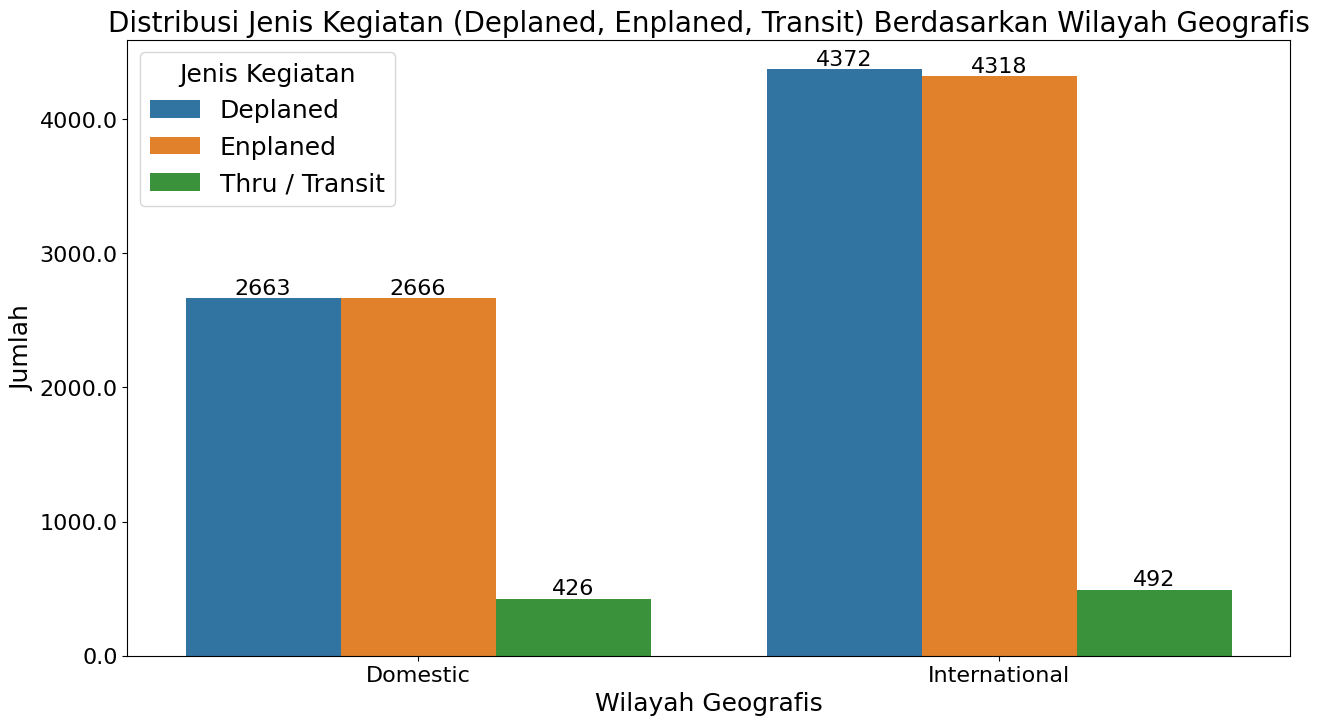

In [142]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=data, x="GEO Summary", hue="Activity Type Code")
plt.title("Distribusi Jenis Kegiatan (Deplaned, Enplaned, Transit) Berdasarkan Wilayah Geografis", fontsize=20)

plt.xlabel("Wilayah Geografis", fontsize=18)
plt.ylabel("Jumlah", fontsize=18)

legend = ax.legend(title="Jenis Kegiatan", fontsize=18)
legend.get_title().set_fontsize(18)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16) 

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(height, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=16)

plt.show()

In [116]:
insights_2 = data.groupby(["GEO Summary", "Activity Type Code"]).size().reset_index(name="Jumlah")
display(insights_2)

,GEO Summary,Activity Type Code,Jumlah
0,Domestic,Deplaned,2663
1,Domestic,Enplaned,2666
2,Domestic,Thru / Transit,426
3,International,Deplaned,4372
4,International,Enplaned,4318
5,International,Thru / Transit,492


<p style=font-size:24px>
Penjelasan: Grafik menggunakan plot batang (countplot) dengan hue untuk membedakan jenis kegiatan. Prinsip Gestalt yang terpenuhi adalah "Similarity", di mana warna yang sama digunakan untuk mengelompokkan jenis kegiatan yang serupa dan menciptakan pemahaman yang jelas tentang distribusi kegiatan di setiap wilayah geografis.
</p>

## 3. Perbandingan jumlah penumpang antara penerbangan domestik dan internasional

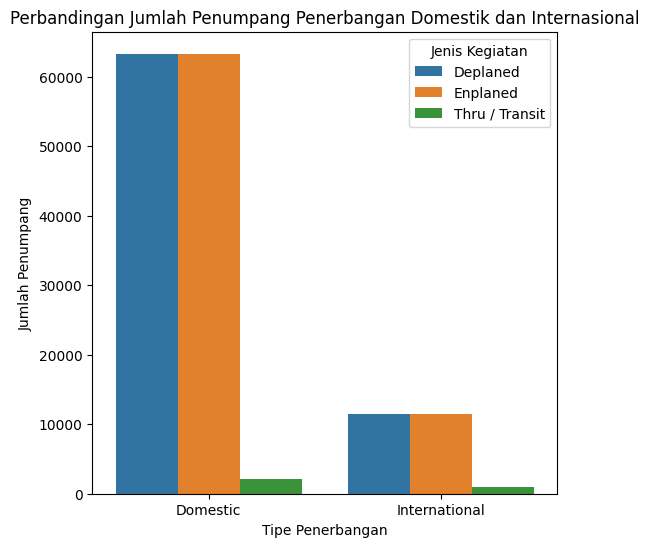

In [41]:
plt.figure(figsize=(6, 6))
sns.barplot(data=data, x="GEO Summary", y="Passenger Count", hue="Activity Type Code", errorbar=None)
plt.title("Perbandingan Jumlah Penumpang Penerbangan Domestik dan Internasional")
plt.xlabel("Tipe Penerbangan")
plt.ylabel("Jumlah Penumpang")
plt.legend(title="Jenis Kegiatan")
plt.show()

<p style=font-size:24px>
Penjelasan: Grafik menggunakan plot batang (barplot) dengan hue untuk membedakan jenis kegiatan dan membandingkan jumlah penumpang antara penerbangan domestik dan internasional. Prinsip Gestalt yang terpenuhi adalah "Closure", di mana bar yang diisi mewakili jumlah penumpang untuk setiap jenis kegiatan dan memberikan pemahaman yang jelas tentang perbandingan antara penerbangan domestik dan internasiona
</p>

## 4. Korelasi antara jumlah penumpang dan harga kategori

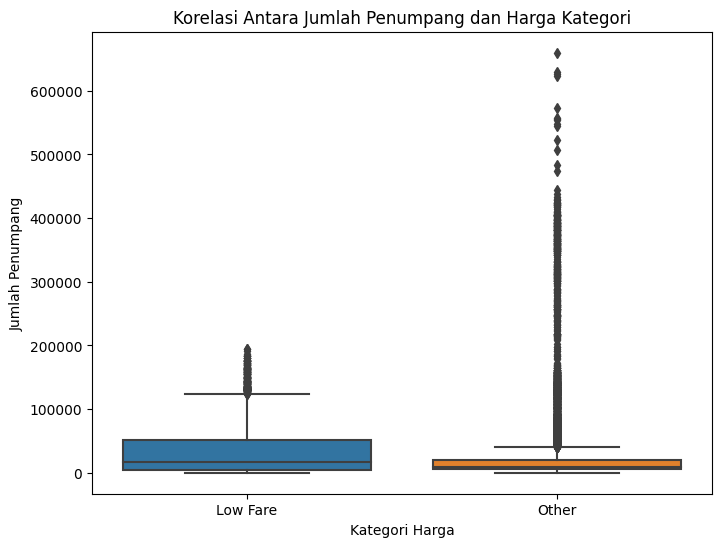

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="Price Category Code", y="Passenger Count")
plt.title("Korelasi Antara Jumlah Penumpang dan Harga Kategori")
plt.xlabel("Kategori Harga")
plt.ylabel("Jumlah Penumpang")
plt.show()

<p style=font-size:24px>
Penjelasan: Grafik menggunakan boxplot untuk menunjukkan korelasi antara jumlah penumpang dan kategori harga. Prinsip Gestalt yang terpenuhi adalah "Proximity", di mana kotak-kotak yang berdekatan mewakili kelompok penumpang dengan kategori harga yang serupa dan memvisualisasikan distribusi dan perbedaan jumlah penumpang di setiap kategori.
</p>

## 5. Trend pertumbuhan penumpang pada setiap bandara

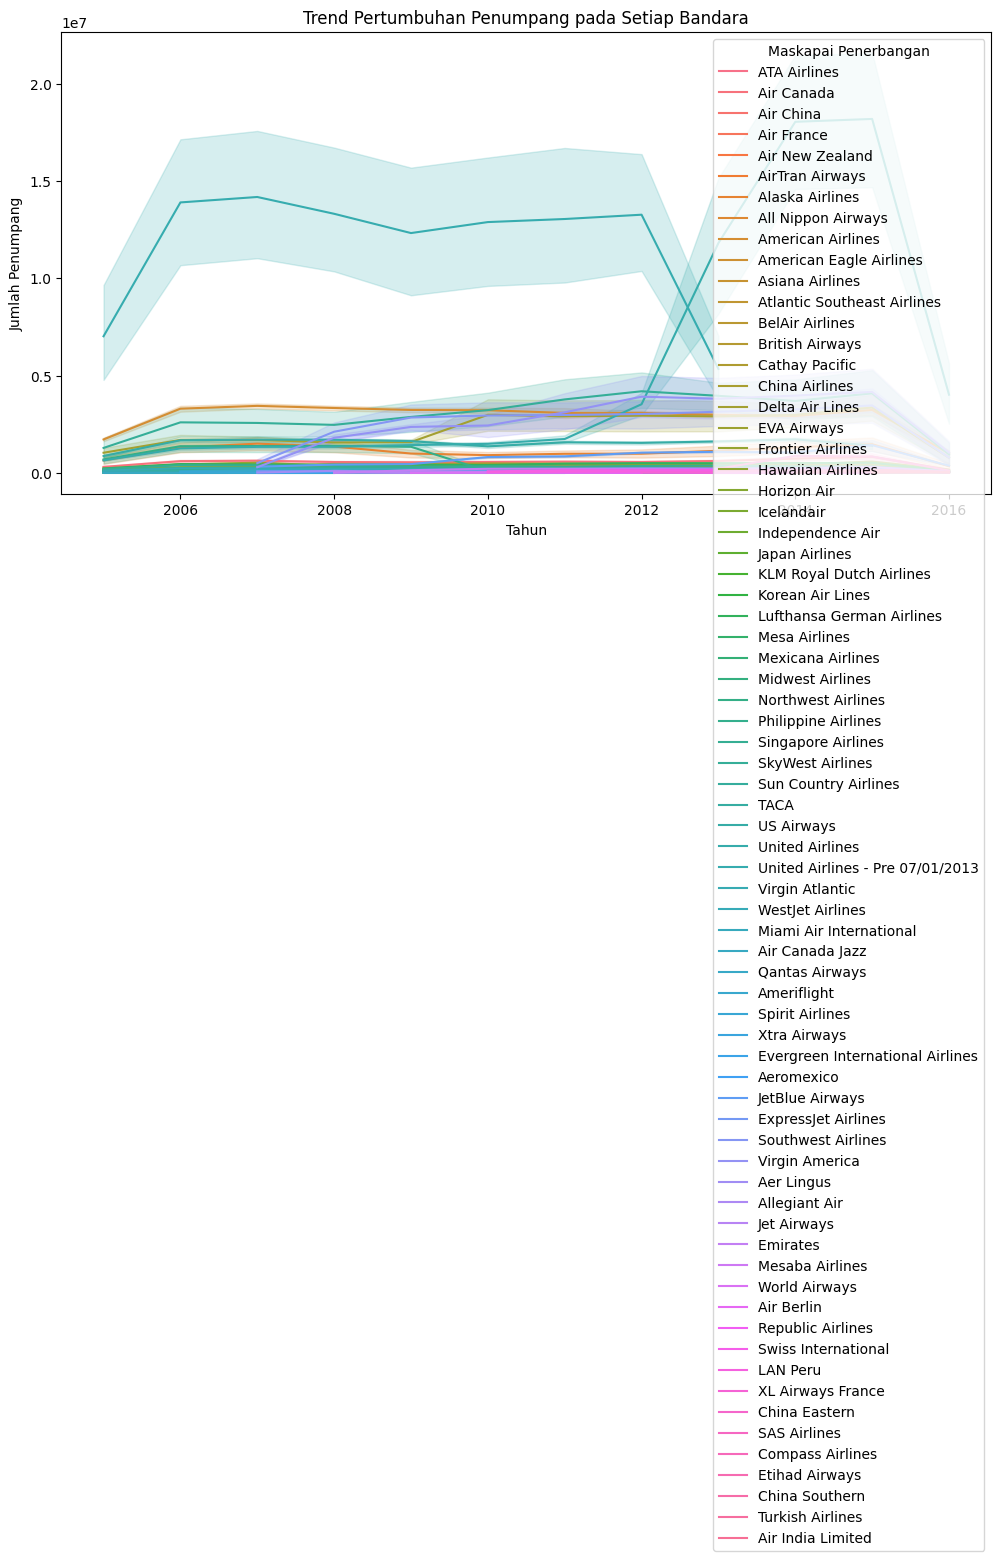

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Year", y="Passenger Count", hue="Operating Airline", estimator="sum")
plt.title("Trend Pertumbuhan Penumpang pada Setiap Bandara")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penumpang")
plt.legend(title="Maskapai Penerbangan")
plt.show()

<p style=font-size:24px>
Penjelasan: Grafik menggunakan garis (line) dengan hue untuk membedakan maskapai penerbangan, menunjukkan tren pertumbuhan penumpang pada setiap bandara. Prinsip Gestalt yang terpenuhi adalah "Similarity", di mana garis yang berdekatan memiliki warna yang sama, yang memudahkan pemahaman tentang tren pertumbuhan penumpang pada setiap bandara.
</p>

## 6. Pengaruh terminal dan area boarding terhadap jumlah penumpang

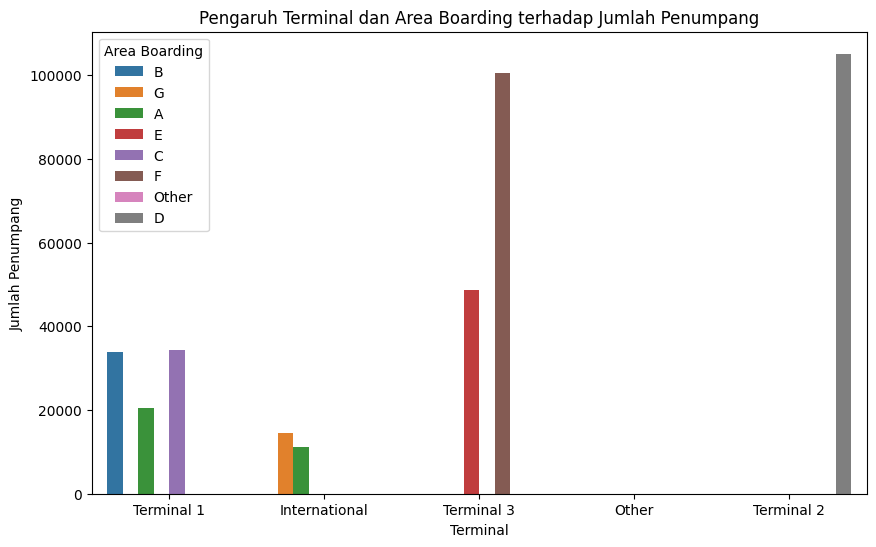

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="Terminal", y="Passenger Count", hue="Boarding Area", errorbar=None)
plt.title("Pengaruh Terminal dan Area Boarding terhadap Jumlah Penumpang")
plt.xlabel("Terminal")
plt.ylabel("Jumlah Penumpang")
plt.legend(title="Area Boarding")
plt.show()

<p style=font-size:24px>
Penjelasan: Grafik menggunakan plot batang (barplot) dengan hue untuk membedakan area boarding, menunjukkan pengaruh terminal dan area boarding terhadap jumlah penumpang. Prinsip Gestalt yang terpenuhi adalah "Closure", di mana bar yang diisi mewakili jumlah penumpang untuk setiap area boarding dan memvisualisasikan perbedaan jumlah penumpang berdasarkan terminal dan area boarding.
</p>

## 7. Perbandingan jumlah penumpang pada bandara-bandara dengan berbagai kategori harga

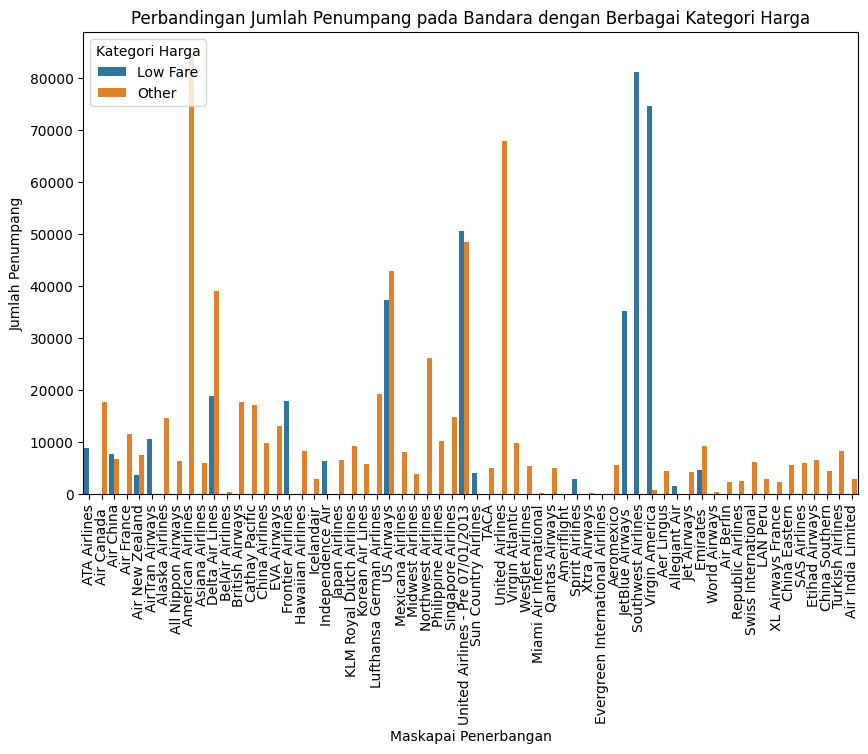

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="Published Airline", y="Passenger Count", hue="Price Category Code", errorbar=None)
plt.title("Perbandingan Jumlah Penumpang pada Bandara dengan Berbagai Kategori Harga")
plt.xlabel("Maskapai Penerbangan")
plt.ylabel("Jumlah Penumpang")
plt.legend(title="Kategori Harga")
plt.xticks(rotation=90)
plt.show()

<p style=font-size:24px>
Penjelasan: Grafik menggunakan plot batang (barplot) dengan hue untuk membedakan kategori harga, menunjukkan perbandingan jumlah penumpang pada bandara-bandara dengan berbagai kategori harga. Prinsip Gestalt yang terpenuhi adalah "Similarity", di mana warna yang sama digunakan untuk mengelompokkan kategori harga yang serupa dan memvisualisasikan perbedaan jumlah penumpang di setiap maskapai penerbangan.
</p>

## 8. Distribusi jumlah penumpang berdasarkan bulan

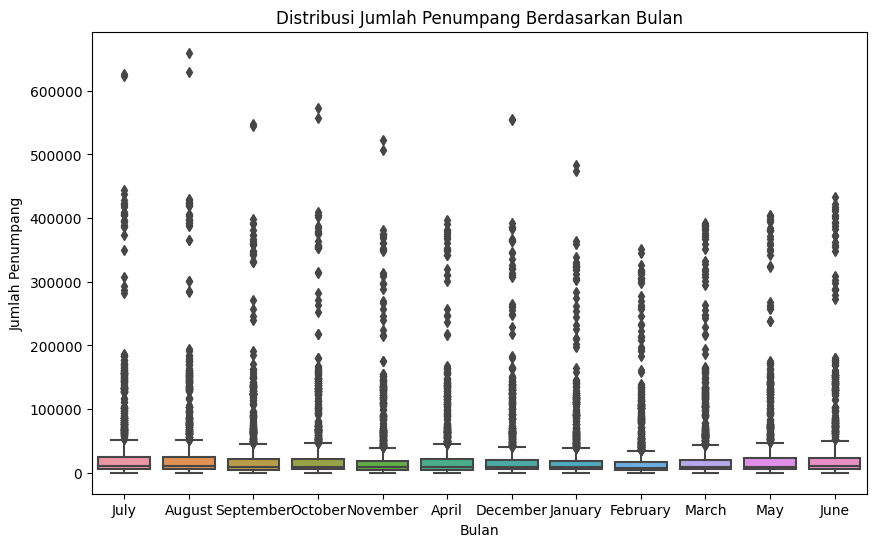

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Month", y="Passenger Count")
plt.title("Distribusi Jumlah Penumpang Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penumpang")
plt.show()

<p style=font-size:24px>
Penjelasan: Grafik menggunakan boxplot untuk menunjukkan distribusi jumlah penumpang berdasarkan bulan. Prinsip Gestalt yang terpenuhi adalah "Proximity", di mana kotak-kotak yang berdekatan mewakili bulan yang berurutan dan memvisualisasikan perbedaan jumlah penumpang di setiap bulan.
</p>

## 9. Korelasi antara jumlah penumpang dan tahun

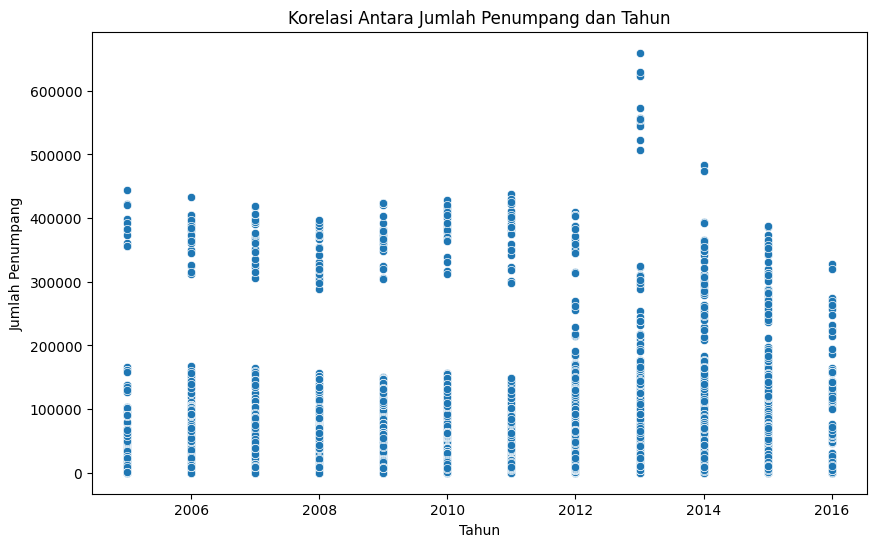

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Year", y="Passenger Count")
plt.title("Korelasi Antara Jumlah Penumpang dan Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penumpang")
plt.show()

<p style=font-size:24px>
Penjelasan: Grafik menggunakan scatterplot untuk menunjukkan korelasi antara jumlah penumpang dan tahun. Prinsip Gestalt yang terpenuhi adalah "Proximity", di mana titik-titik yang dekat mewakili pasangan tahun dan jumlah penumpang yang saling berhubungan.
</p>

## 10. Distribusi jumlah penumpang berdasarkan maskapai penerbangan

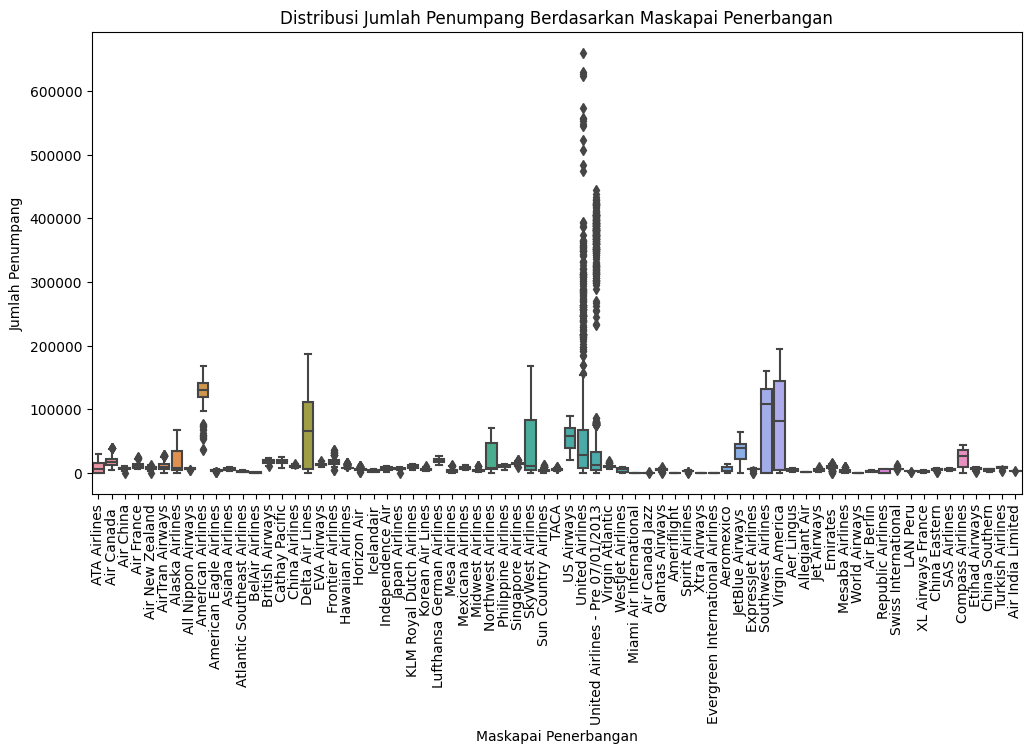

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="Operating Airline", y="Passenger Count")
plt.title("Distribusi Jumlah Penumpang Berdasarkan Maskapai Penerbangan")
plt.xlabel("Maskapai Penerbangan")
plt.ylabel("Jumlah Penumpang")
plt.xticks(rotation=90)
plt.show()

<p style=font-size:24px>
Penjelasan: Grafik menggunakan boxplot untuk menunjukkan distribusi jumlah penumpang berdasarkan maskapai penerbangan. Prinsip Gestalt yang terpenuhi adalah "Similarity", di mana kotak-kotak yang berdekatan mewakili maskapai penerbangan yang berbeda dan memvisualisasikan perbedaan jumlah penumpang di setiap maskapai penerbangan.
</p>

## 11. Perbandingan jumlah penumpang pada bandara dengan berbagai kategori harga menggunakan barplot dengan hue berdasarkan jenis kegiatan

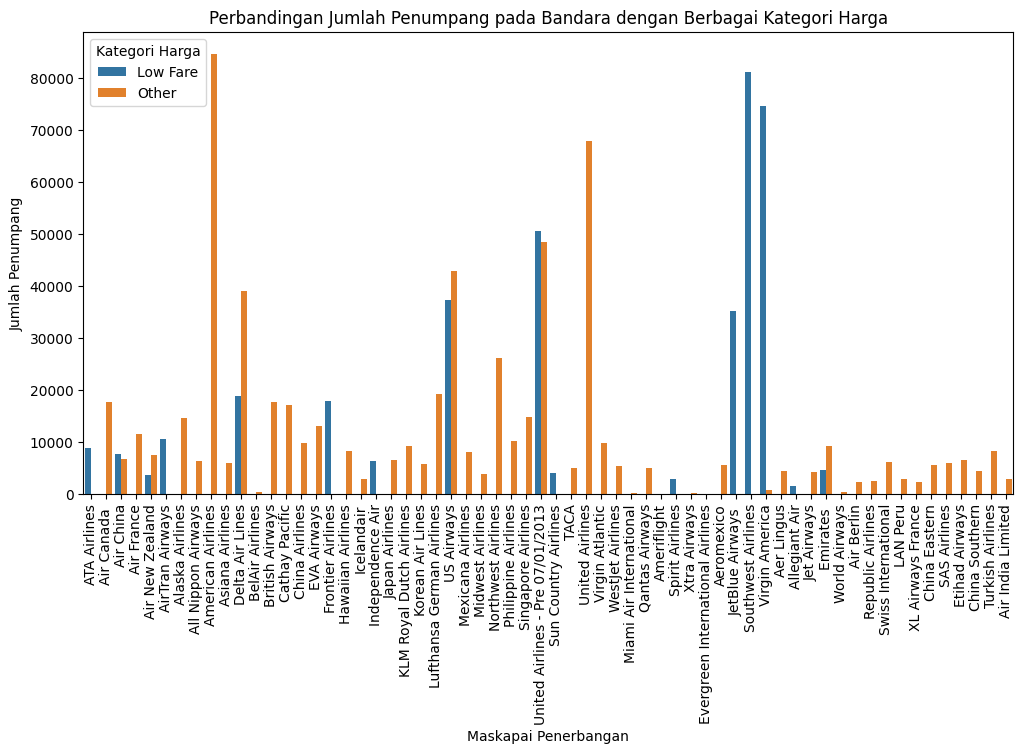

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="Published Airline", y="Passenger Count", hue="Price Category Code", errorbar=None)
plt.title("Perbandingan Jumlah Penumpang pada Bandara dengan Berbagai Kategori Harga")
plt.xlabel("Maskapai Penerbangan")
plt.ylabel("Jumlah Penumpang")
plt.legend(title="Kategori Harga")
plt.xticks(rotation=90)
plt.show()

<p style=font-size:24px>
Penjelasan: Grafik menggunakan plot batang (barplot) dengan hue untuk membedakan kategori harga dan membandingkan jumlah penumpang pada bandara dengan berbagai kategori harga. Prinsip Gestalt yang terpenuhi adalah "Similarity", di mana warna yang sama digunakan untuk mengelompokkan kategori harga yang serupa dan memvisualisasikan perbedaan jumlah penumpang di setiap maskapai penerbangan.
</p>

## 12. Perbandingan jumlah penumpang pada setiap bandara menggunakan stacked barplot dengan hue berdasarkan jenis kegiatan

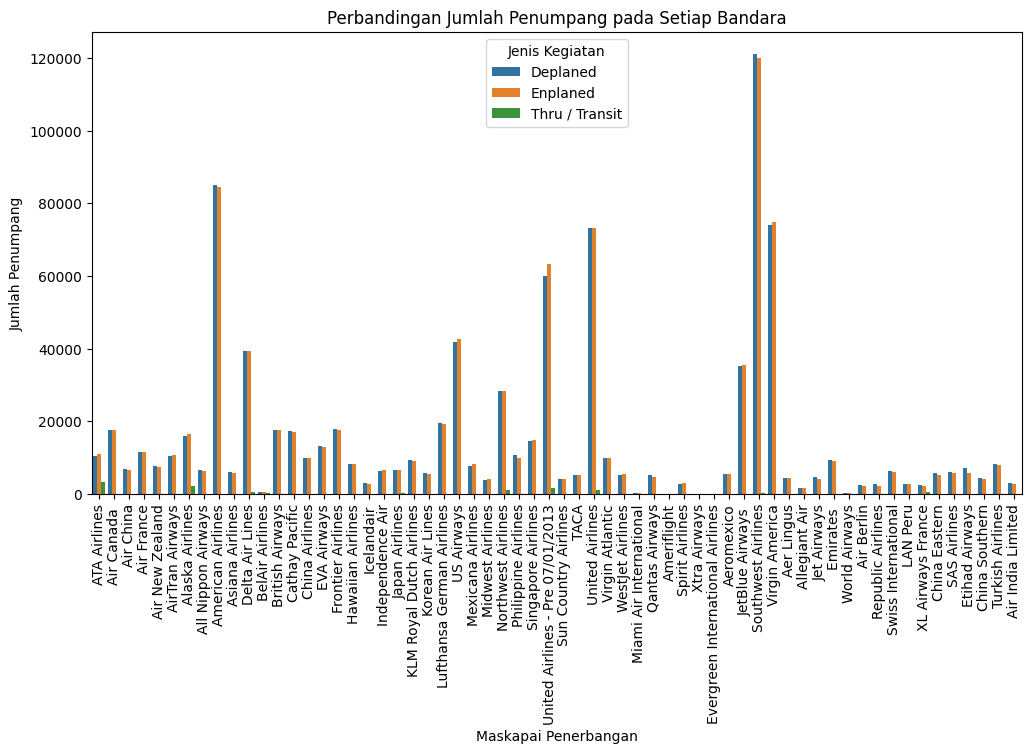

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="Published Airline", y="Passenger Count", hue="Activity Type Code", errorbar=None)
plt.title("Perbandingan Jumlah Penumpang pada Setiap Bandara")
plt.xlabel("Maskapai Penerbangan")
plt.ylabel("Jumlah Penumpang")
plt.legend(title="Jenis Kegiatan")
plt.xticks(rotation=90)
plt.show()

<p style=font-size:24px>
Grafik menggunakan plot batang (barplot) dengan hue untuk membedakan jenis kegiatan, menunjukkan perbandingan jumlah penumpang pada setiap bandara. Prinsip Gestalt yang terpenuhi adalah "Similarity", di mana warna yang sama digunakan untuk mengelompokkan jenis kegiatan yang serupa dan memvisualisasikan perbedaan jumlah penumpang di setiap maskapai penerbangan dan bandara.
</p>